In [7]:
import pandas as pd
import numpy as np 
import random

import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.tools import plotting
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import xgboost as xgb
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.preprocessing import LabelEncoder
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
    return color
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('E:\Data_science\Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
table = ff.create_table(df.head())
table

Figure({
    'data': [{'colorscale': [[0, '#00083e'], [0.5, '#ededee'], [1, '#ffffff']],
              'hoverinfo': 'none',
              'opacity': 0.75,
              'showscale': False,
              'type': 'heatmap',
              'uid': '3427c1d2-c3f5-11e8-9fdb-402cf4f1c872',
              'z': [[0, 0, 0, 0, 0, 0], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [1, 1, 1,
                    1, 1, 1], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [1, 1, 1, 1, 1, 1],
                    [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]}],
    'layout': {'annotations': [{'align': 'left',
                                'font': {'color': '#ffffff'},
                                'showarrow': False,
                                'text': '<b>Id</b>',
                                'x': -0.45,
                                'xanchor': 'left',
                                'xref': 'x',
                                'y': 0,
                                'yref': 'y'},
                               {'align': 'left',
       

In [10]:
py.iplot(table,filename='jupyter-table1')

In [11]:
py.iplot(ff.create_table(df.describe()), filename='jupyter-table1')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


# Visualization of data

In [13]:
species = df['Species'].unique()
species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
species_count = df['Species'].value_counts()
data = [go.Bar(x=species_count.index,y=species_count.values, marker = dict(color = random_colors(3)))]

py.iplot(data)

In [15]:
#correlation between the features

In [16]:
corelation = df.corr()
data = [go.Heatmap(z=np.array(corelation.values),x = np.array(corelation.columns), y = np.array(corelation.columns),colorscale='Blackbody' )]
py.iplot(data)

In [17]:
#visualisation of species based on sepal length and width

In [23]:
versicolor = go.Scatter( x = df['SepalLengthCm'][df.Species =="Iris-versicolor"], y=df['SepalWidthCm'][df.Species=='Iris-versicolor'], mode = 'markers', name ='versicolor')
setosa = go.Scatter(x=df['SepalLengthCm'][df.Species=='Iris-setosa'], y=df['SepalWidthCm'][df.Species=='Iris-setosa'], mode='markers', name='setosa')
virginica = go.Scatter(x=df['SepalLengthCm'][df.Species=='Iris-virginica'], y= df['SepalWidthCm'][df.Species=='Iris-virginica'], mode='markers', name='virginica')
data = [versicolor, setosa, virginica]
fig = dict(data=data)
py.iplot(fig, filename='styled-scatter')

In [24]:
#the distribution of values based on petal width

In [28]:
trace1 = go.Box(y=df['PetalWidthCm'][df['Species']=='Iris-setosa'], boxmean=True, name='setosa')
trace2 = go.Box(y=df['PetalWidthCm'][df['Species']=='Iris-versicolor'], boxmean=True, name='versicolor')
trace3 = go.Box(y=df['PetalWidthCm'][df['Species'] == 'Iris-virginica'],boxmean=True, name = 'virginica')
data = [trace1, trace2, trace3]
py.iplot(data)

In [29]:
#the distribution of values based on sepal length

In [30]:
trace1 = go.Box(y=df['SepalLengthCm'][df['Species'] == 'Iris-setosa'], name = 'setosa')

trace2 = go.Box(y=df['SepalLengthCm'][df['Species'] == 'Iris-versicolor'], name = 'versicolor')

trace3 = go.Box(y=df['SepalLengthCm'][df['Species'] == 'Iris-virginica'], name = 'virginica')

data = [trace1, trace1, trace2]
py.iplot(data)

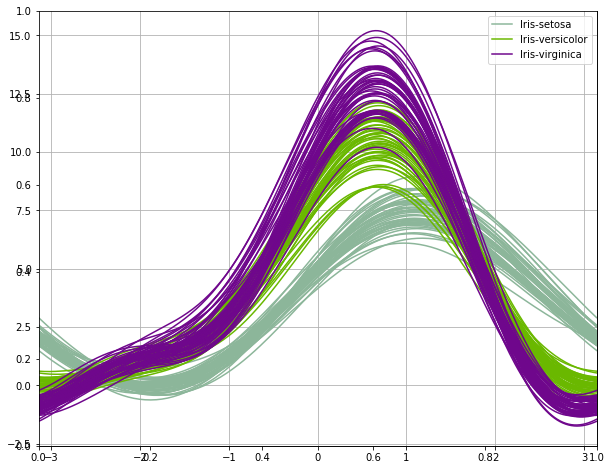

In [32]:
plt.subplots(figsize = (10,8))

plotting.andrews_curves(df.drop("Id", axis=1), "Species")

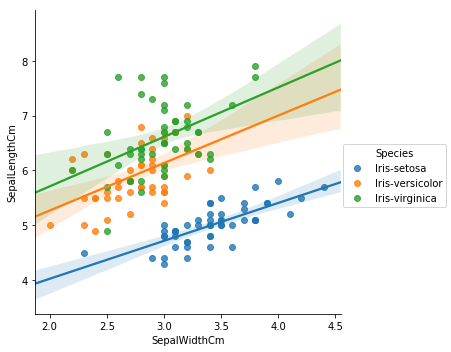

In [33]:
sns.lmplot(x='SepalWidthCm', y='SepalLengthCm', hue='Species', data=df)

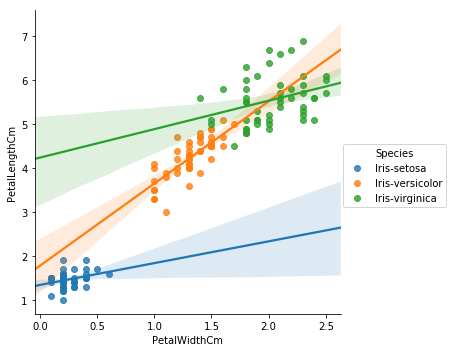

In [34]:
sns.lmplot(x="PetalWidthCm", y="PetalLengthCm", hue="Species", data=df)

In [35]:
#Machine learning analysis

# The highlighted Concerns to address by using scikit-learn are 

#To predict the given sepal and petal dimensions follows to which type of species.
#There are 3 type of species Iris-setosa Iris-versicolor Iris-virginica.
#Those species names will convert to a categorical values

In [37]:
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [38]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

In [40]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

# results of different machine learning algorithms

In [42]:
#Logistic regression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_predict = lr_model.predict(x_test)
print('Logistic Regression result is -', accuracy_score(lr_predict,y_test))

Logistic Regression result is - 0.955555555556


In [43]:
#SVM 
svm_model = SVC(kernel='linear')
svm_model.fit(x_train,y_train)
svc_predict = svm_model.predict(x_test)
print('SVM result is-',accuracy_score(lr_predict,y_test))

SVM result is- 0.955555555556


In [44]:
#Naive Bayes Classification

nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
nb_predict = nb_model.predict(x_test)
print('the result of Naive bayes is-', accuracy_score(nb_predict,y_test))

the result of Naive bayes is- 0.955555555556


In [45]:
#Decision Tree 

dt_model = DecisionTreeClassifier(max_leaf_nodes=3)
dt_model.fit(x_train, y_train)
dt_predict = dt_model.predict(x_test)
print('the result of Decision tree is-', accuracy_score(dt_predict,y_test))

the result of Decision tree is- 0.933333333333


In [47]:
#Random Forest

rfc_model = RandomForestClassifier(max_depth=3)
rfc_model.fit(x_train,y_train)
rfc_predict = rfc_model.predict(x_test)
print('the result of Random Forest classifier is -', accuracy_score(rfc_predict,y_test))

the result of Random Forest classifier is - 0.977777777778


In [48]:
# Extra tree classifier

etc_model = ExtraTreesClassifier()
etc_model.fit(x_train,y_train)
etc_model.predict(x_test)
print('the result of Exta tree classsifer is-', accuracy_score,y_test)

the result of Exta tree classsifer is- <function accuracy_score at 0x0000022EBA1262F0> [0 0 0 2 1 2 1 1 2 0 2 0 0 2 2 1 1 1 0 2 1 0 1 1 1 1 1 2 0 0 2 1 2 1 2 1 1
 1 1 2 0 0 0 1 1]


In [49]:
#K - nearest neighbors classifier (KNN)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
knn_predict = knn_model.predict(x_test)
print('the result of knn is-', knn_predict,y_test)

the result of knn is- [0 0 0 2 1 2 1 1 2 0 2 0 0 2 2 1 1 1 0 2 1 0 1 1 1 1 1 2 0 0 2 1 2 1 2 1 1
 1 1 2 0 0 0 1 1] [0 0 0 2 1 2 1 1 2 0 2 0 0 2 2 1 1 1 0 2 1 0 1 1 1 1 1 2 0 0 2 1 2 1 2 1 1
 1 1 2 0 0 0 1 1]
